In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
data.index = pd.date_range(start='1700', end='2009', freq='A')

from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')


ADF Statistic: -2.837781
p-value: 0.053076
Critical Values:


In [26]:
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

	1%: -3.452
	5%: -2.871
	10%: -2.572


Text(0.5, 1.0, '2nd Order Differencing')

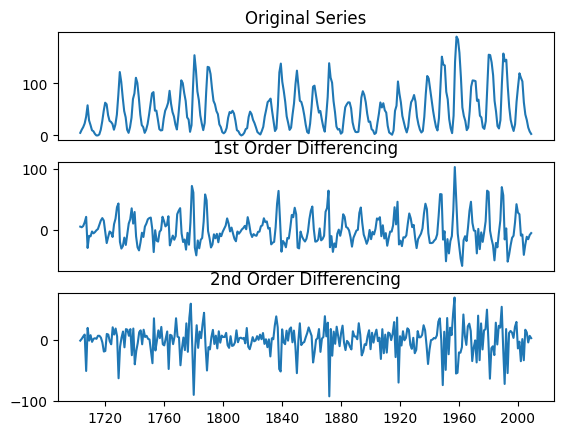

In [27]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.values); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.diff().diff()); ax3.set_title('2nd Order Differencing')

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


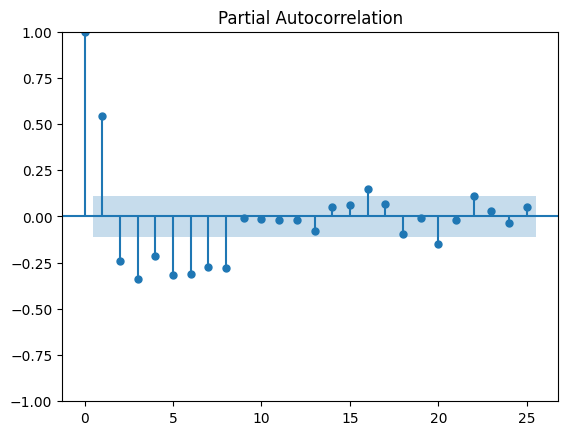

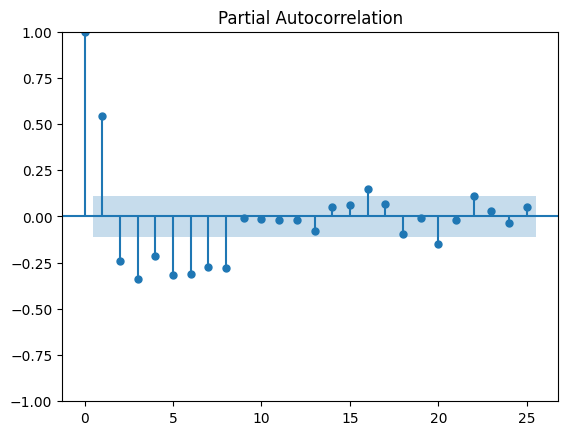

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.SUNACTIVITY.diff().dropna())

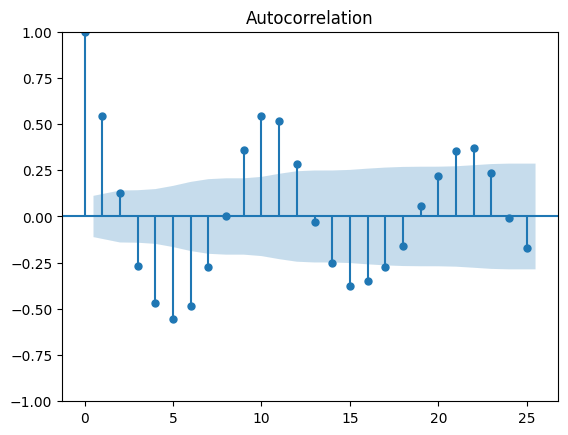

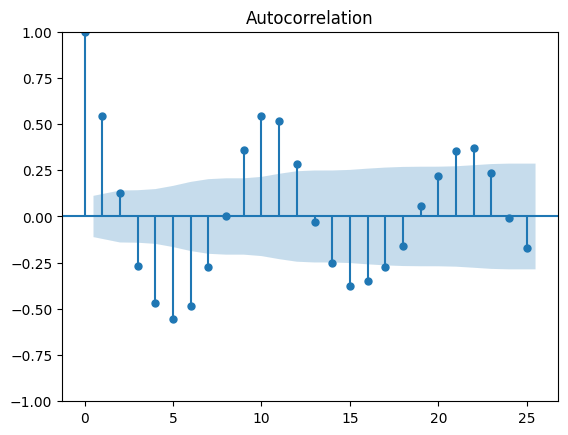

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.SUNACTIVITY.diff().dropna())

In [30]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['1900':], order = (8,1,1))
model_fit = model.fit()

# p = 8 sectik cünkü pacf grafiğinde 8 den sonra oldukça fazla değişim görülüyor.

# q = 1 sectik cunku acf grafiginde 1'den sonra oldukca fazla degisim goruluyor.

# d = 1 sectik cünkü veride tren

predicted_data = model_fit.predict(start="1950", end="2008")
new_data = data['1950':]
new_data = new_data['SUNACTIVITY']

In [31]:
error = abs(np.divide((np.subtract(new_data.values, predicted_data.values)), new_data.values) * 100)
error_index = new_data.index

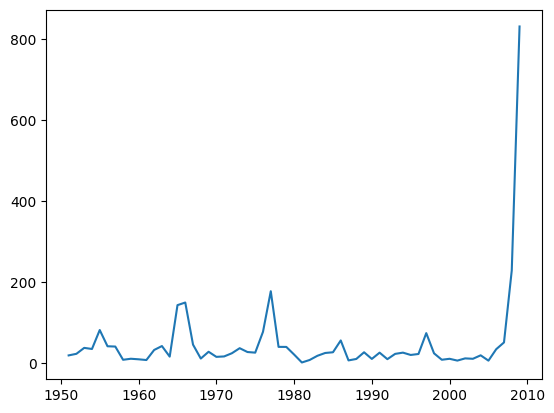

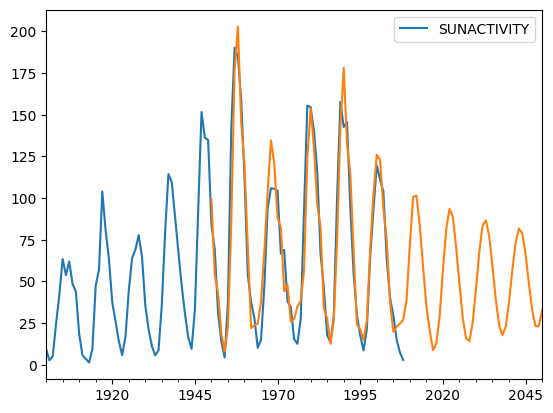

In [32]:
error_df = pd.DataFrame(error, error_index)
plt.plot(error_df)

fig, ax = plt.subplots()

ax = data.loc['1900':].plot(ax=ax)
predicted_data.plot(ax=ax)

plt.show()